# Exploratory Data Analysis

Analysis raw dataset

In [1]:
# import library
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
from pathlib import Path

In [3]:
BASE_DIR = Path.cwd().parent

In [ ]:
Data = {"data": {}}

print("======================== skin cancer ========================")
for folder in os.listdir(f"{BASE_DIR}/data/raw/ISIC 2019 Skin Lesion images for classification/train"):
    if folder not in ['ISIC_2019_Training_GroundTruth.csv', 'ISIC_2019_Training_Metadata.csv'] :
        num_of_image_train = len(glob.glob(f"{BASE_DIR}/data/raw/ISIC 2019 Skin Lesion images for classification/train/{folder}/*.jpg"))
        print(f"{folder} : {num_of_image_train}")
        Data["data"][folder] = num_of_image_train

======================== skin cancer ========================
AK : 867
BCC : 3323
BKL : 2624
DF : 239
MEL : 4522
NV : 12875
SCC : 628
VASC : 253


In [ ]:
image_data = pd.DataFrame(Data, columns=['data']).reset_index()
image_data.sort_values(by='data',ascending=False, inplace=True)
image_data.to_csv(f"{BASE_DIR}/src/data/image_data.csv", index=False)

In [19]:
image_data

,index,data
5,NV,12875
4,MEL,4522
1,BCC,3323
2,BKL,2624
0,AK,867
6,SCC,628
7,VASC,253
3,DF,239


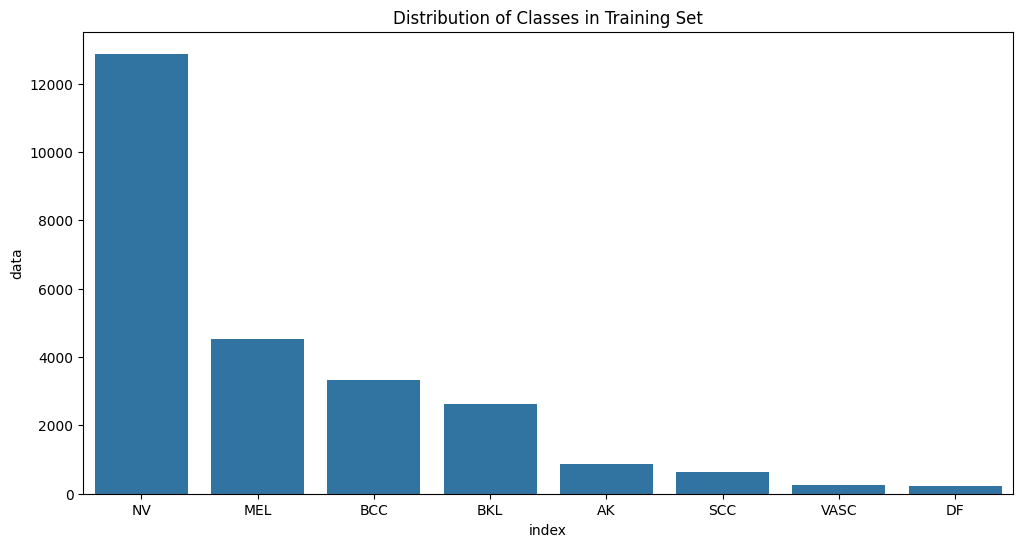

In [20]:
# ve bieu do cot phan bo class
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data= image_data,x='index', y='data', ax=ax)
plt.title('Distribution of Classes in Training Set')
plt.show()

In [ ]:
df1 = pd.read_csv(f"{BASE_DIR}/data/raw/ISIC 2019 Skin Lesion images for classification/train/ISIC_2019_Training_GroundTruth.csv")
df2 = pd.read_csv(f"{BASE_DIR}/data/raw/ISIC 2019 Skin Lesion images for classification/train/ISIC_2019_Training_Metadata.csv")

In [41]:
print(df1.head())

          image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0  ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1  ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2  ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3  ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4  ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0


In [46]:
for column in df1.columns[1:-1]:
    print(f"{column}: {df1[column].sum()}")

MEL: 4522.0
NV: 12875.0
BCC: 3323.0
AK: 867.0
BKL: 2624.0
DF: 239.0
VASC: 253.0
SCC: 628.0


In [42]:
print(df2.head())

          image  age_approx anatom_site_general lesion_id     sex
0  ISIC_0000000        55.0      anterior torso       NaN  female
1  ISIC_0000001        30.0      anterior torso       NaN  female
2  ISIC_0000002        60.0     upper extremity       NaN  female
3  ISIC_0000003        30.0     upper extremity       NaN    male
4  ISIC_0000004        80.0     posterior torso       NaN    male
